In [8]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import random
from scipy.spatial import distance
from utils import jensen_shannon_distance_numerical
from evidently.calculations.stattests import jensenshannon_stat_test

In [9]:
def jensen_shannon_distance(production_col: pd.DataFrame, baseline_col: pd.DataFrame) -> float:
    """Compute data drift using Jensen-Shannon Distance for each feature.

    Args:
        production_col: DataFrame column from production dataset provided by user.
        baseline_col: DataFrame column from baseline dataset provided by user.

    Returns:
        float: The Jensen-Shannon distances between production and baseline column

    """
    values_per_column = list(set(baseline_col.unique()) | set(production_col.unique()))
    current_frequencies = np.array([production_col.to_list().count(value) for value in values_per_column])
    reference_frequencies = np.array([baseline_col.to_list().count(value) for value in values_per_column])
    current_ratios = current_frequencies / np.sum(current_frequencies)
    reference_ratios = reference_frequencies / np.sum(reference_frequencies)
    return distance.jensenshannon(current_ratios, reference_ratios)

In [10]:
observations = 10_000
x = pd.Series(np.random.normal(50, 15, observations)) # reference
w = pd.Series(np.random.normal(50, 15, observations)) # identical with x

In [11]:
print("Jensen-Shannon Distance Current Implementation:", jensen_shannon_distance(x, w))

Jensen-Shannon Distance Current Implementation: 0.8325546111576977


In [12]:
print("Jensen-Shannon Distance Implementation in this Repo", jensen_shannon_distance_numerical(x, w, bin_strategy='stu'))

Jensen-Shannon Distance Implementation in this Repo 0.016184214339995565


In [13]:
print("Jensen Shannon Evidently Implementation: ", jensenshannon_stat_test(x, w, feature_type='num', threshold=0.1))

Jensen Shannon Evidently Implementation:  StatTestResult(drift_score=0.018675562151804537, drifted=False, actual_threshold=0.1)


<AxesSubplot:>

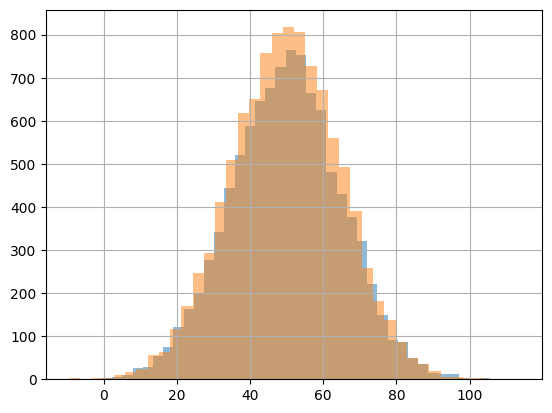

In [14]:
x.hist(bins=40, alpha=0.5)
w.hist(bins=40, alpha=0.5)